## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

### Question 1.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

### Question 1.2

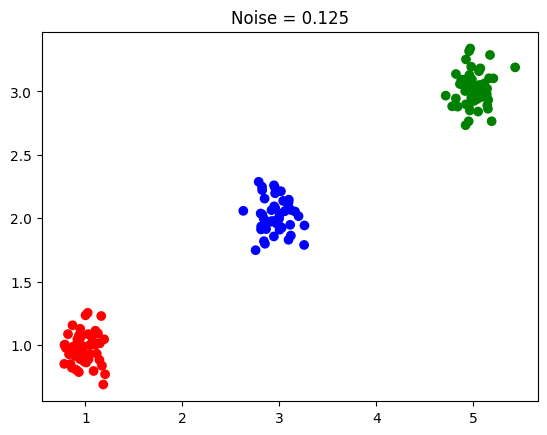

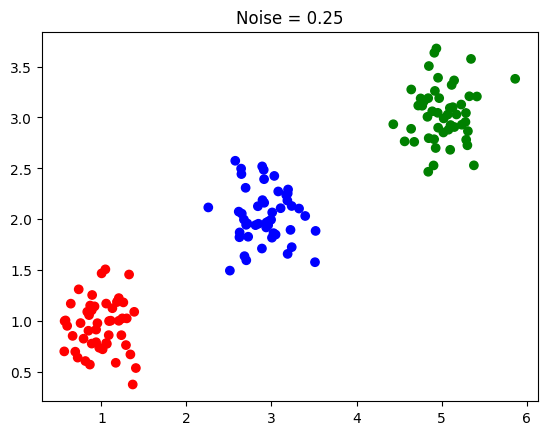

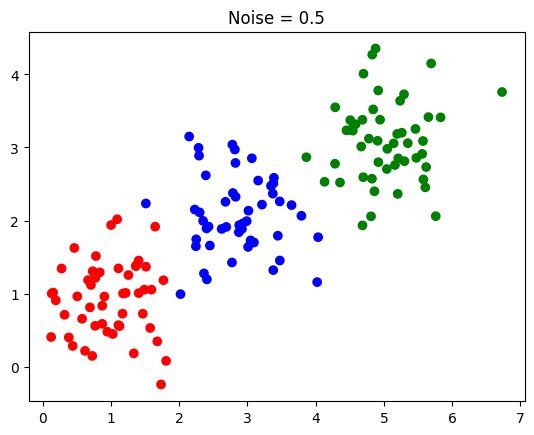

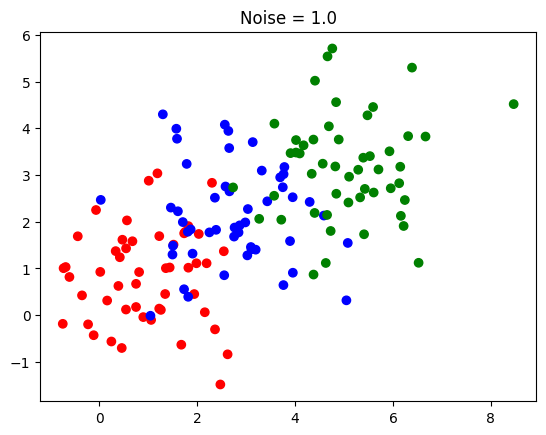

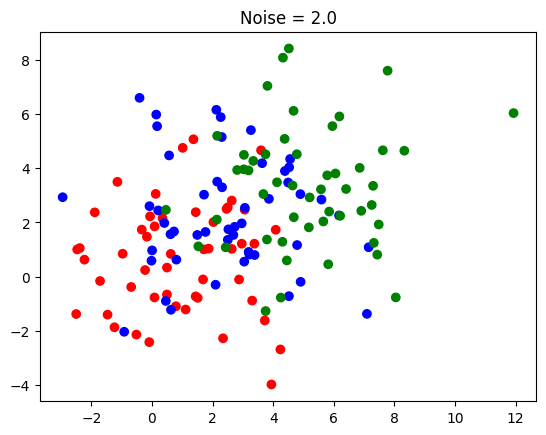

In [2]:
### Question 1.2
plt.scatter(df0_125["x1"], df0_125["x2"], c=df0_125["group"].map({"a":"red","b":"blue","c":"green"}))
plt.title("Noise = 0.125")
plt.show()

plt.scatter(df0_25["x1"], df0_25["x2"], c=df0_25["group"].map({"a":"red","b":"blue","c":"green"}))
plt.title("Noise = 0.25")
plt.show()

plt.scatter(df0_5["x1"], df0_5["x2"], c=df0_5["group"].map({"a":"red","b":"blue","c":"green"}))
plt.title("Noise = 0.5")
plt.show()

plt.scatter(df1_0["x1"], df1_0["x2"], c=df1_0["group"].map({"a":"red","b":"blue","c":"green"}))
plt.title("Noise = 1.0")
plt.show()

plt.scatter(df2_0["x1"], df2_0["x2"], c=df2_0["group"].map({"a":"red","b":"blue","c":"green"}))
plt.title("Noise = 2.0")
plt.show()



As the noise increases, the groups become more dispersed. In the noise = 0.125 plot, the groups are condensed and separated from one another. In the noise = 2.0 plot, the points are spread apart and no longer separated by group.

### Question 1.3

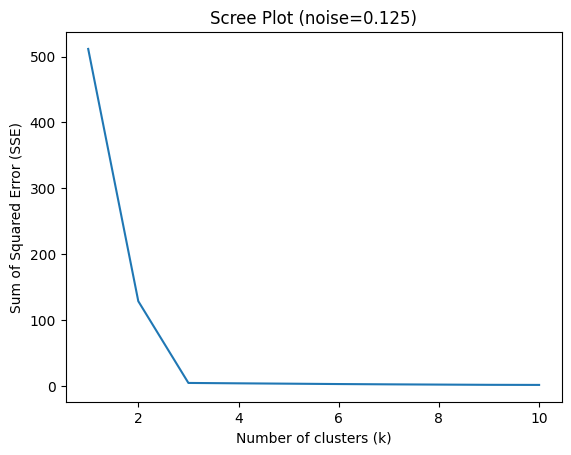

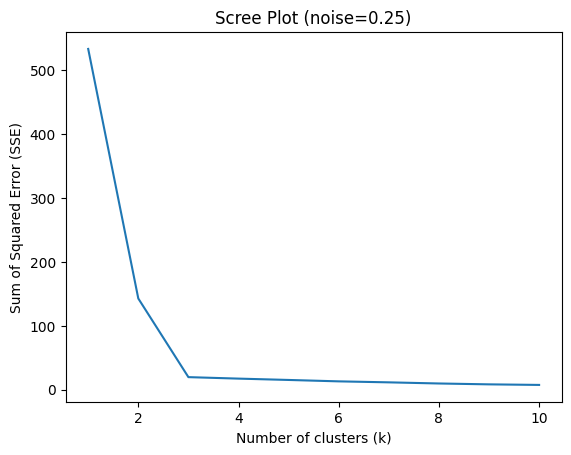

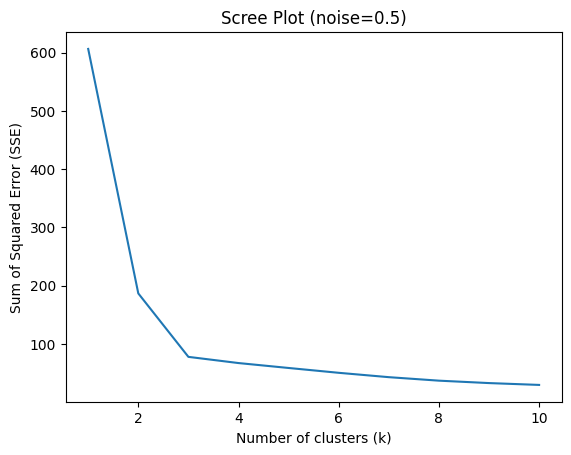

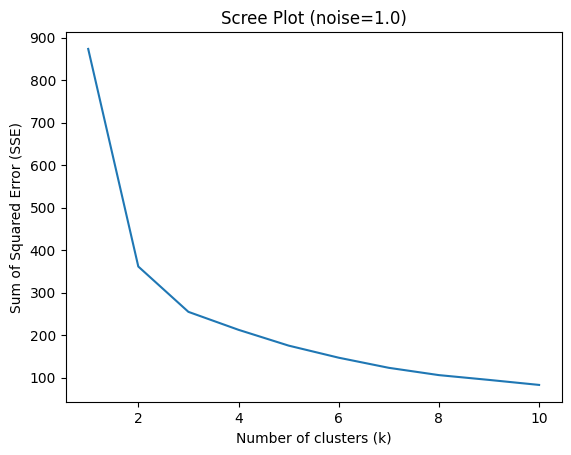

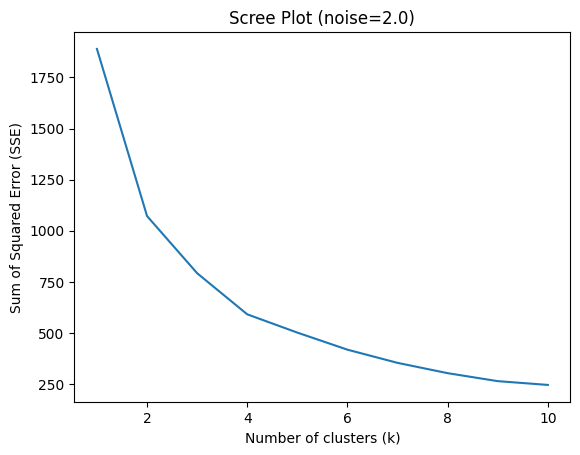

In [3]:
from sklearn.cluster import KMeans # Import kmc

def scree_plot(X, noise_level):
    k_bar = 10
    SSE = []
    for k in range(k_bar):
        model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)
        model = model.fit(X)
        SSE.append(model.inertia_)
    sns.lineplot(x=np.arange(1, k_bar+1), y=SSE).set_title(f"Scree Plot (noise={noise_level})")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Sum of Squared Error (SSE)")
    plt.show()

scree_plot(df0_125[["x1","x2"]], 0.125)
scree_plot(df0_25[["x1","x2"]], 0.25)
scree_plot(df0_5[["x1","x2"]], 0.5)
scree_plot(df1_0[["x1","x2"]], 1.0)
scree_plot(df2_0[["x1","x2"]], 2.0)


As noise increases, the scaling of the y-axis changes. When noise is 0.125, the SSE ranges from 0 to 500. When noise is 2.0, the range is 250 to 1750. The elbow gets less clear as noise increases, which makes it more difficult to choose a k.  

### Question 1.4

When looking at the plots, I need to find the point where the drop in SSE from k-1 to k is significant compared to k to k+1. For example, when noise is 0.5, the drop in SSE from k = 1 to k = 2 (500 to 180) is more dramatic than the drop in SSE from k = 2 to k = 3 (180 to 70).

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

### Question 2.1

In [4]:
df = pd.read_csv('/2022 election cycle fundraising.csv')
df.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


In [5]:
# Remove '$' and ',' from Raised, Spent, Cash on Hand, and Debts
df["Raised"] = df["Raised"] .str.replace('$', '')
df["Raised"] = df["Raised"].str.replace(',', '')

df["Spent"] = df["Spent"] .str.replace('$', '')
df["Spent"] = df["Spent"].str.replace(',', '')

df["Cash on Hand"] = df["Cash on Hand"] .str.replace('$', '')
df["Cash on Hand"] = df["Cash on Hand"].str.replace(',', '')

df["Debts"] = df["Debts"] .str.replace('$', '')
df["Debts"] = df["Debts"].str.replace(',', '')

df.head()


,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396,7449678,851851,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741,1243502,2472888,0
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0
3,3,Adam Smith,Democratic,Washington,House,1211111,1173466,623472,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611,1664674,1098579,0


In [6]:
# Coerce the columns to numeric
df["Raised"] = pd.to_numeric(df["Raised"])
df["Spent"] = pd.to_numeric(df["Spent"])
df["Cash on Hand"] = pd.to_numeric(df["Cash on Hand"])
df["Debts"] = pd.to_numeric(df["Debts"])
df.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396,7449678,851851,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741,1243502,2472888,0
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0
3,3,Adam Smith,Democratic,Washington,House,1211111,1173466,623472,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611,1664674,1098579,0


In [7]:
# Check for NAs
print('Total Missings: \n', df["Raised"].isna().sum(),'\n')
print('Total Missings: \n', df["Spent"].isna().sum(),'\n')
print('Total Missings: \n', df["Cash on Hand"].isna().sum(),'\n')
print('Total Missings: \n', df["Debts"].isna().sum(),'\n')

Total Missings: 
 0 

Total Missings: 
 0 

Total Missings: 
 0 

Total Missings: 
 0 



### Question 2.2

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans # Import kmc

# Max-min scaler function:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Create normalizations and add to the dataframe
min_x1 = min(df.loc[:,'Raised'])
max_x1 = max(df.loc[:,'Raised'])

min_x2 = min(df.loc[:,'Spent'])
max_x2 = max(df.loc[:,'Spent'])

# Preprocess the data for scikit:
X = df.loc[ : , ['Raised','Spent'] ] # Select data to cluster
X = X.apply(maxmin)
X.head()

,Raised,Spent
0,0.103512,0.098074
1,0.040686,0.016371
2,0.254404,0.183753
3,0.029527,0.015449
4,0.034148,0.021915


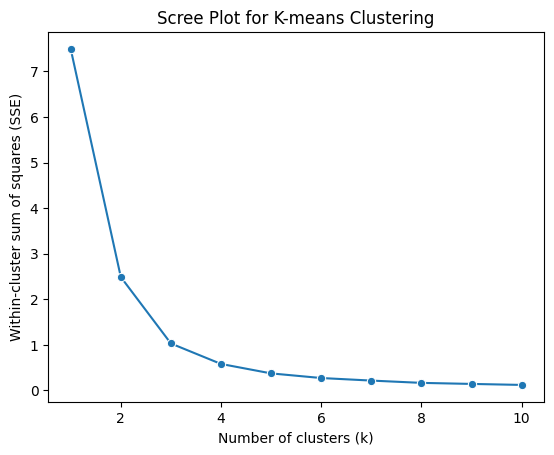

In [9]:
# Create scree plot
k_bar = 10                # maximum number of clusters to try
SSE = []                  # list to hold sum of squared errors

for k in range(1, k_bar+1):   # k goes from 1 to 10
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(X)              # fit model
    SSE.append(model.inertia_)

# Plot the scree curve
sns.lineplot(x=np.arange(1, k_bar+1), y=SSE, marker="o")
plt.title("Scree Plot for K-means Clustering")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-cluster sum of squares (SSE)")
plt.show()

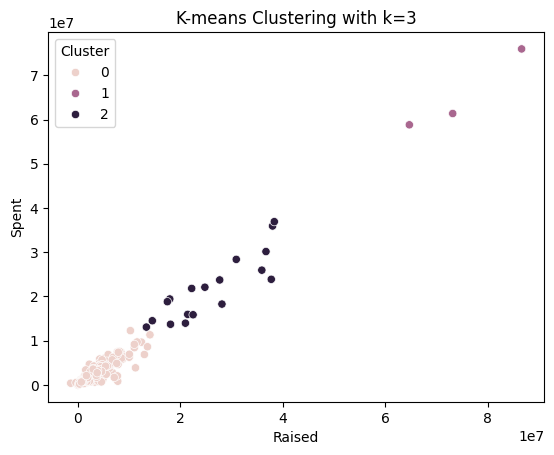

In [29]:
# Chosen k based on scree plot
k = 3
model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
model.fit(X)

# Add cluster labels back into the dataframe
df["Cluster"] = model.labels_

# Scatter plot of Raised vs Spent, colored by cluster
sns.scatterplot(data=df, x="Raised", y="Spent", hue="Cluster")
plt.title(f"K-means Clustering with k={k}")
plt.show()


In [30]:
small_clusters = df["Cluster"].value_counts().nsmallest(2).index
df[df["Cluster"].isin(small_clusters)]
df.sort_values(by=['Spent'], ascending = False)

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Cluster,Cluster_all
417,417,Raphael Warnock,Democratic,Georgia,Senate,86581469,75959810,22762985,0,1,1
340,340,Mark Kelly,Democratic,Arizona,Senate,73140886,61357281,13186127,0,1,1
523,523,Val Demings,Democratic,Florida,House,64682883,58806664,6647641,0,1,1
499,499,Tim Ryan,Democratic,Ohio,House,38334636,36909832,1424804,68075,2,1
87,87,Catherine Cortez Masto,Democratic,Nevada,Senate,37993811,35928936,5089745,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
363,363,Michael San Nicolas,Democratic,Guam,Senate,13025,17683,16205,14303,0,0
314,314,Liz Cheney,Republican,Wyoming,House,0,0,0,0,0,0
27,27,Ann Kirkpatrick,Democratic,Arizona,House,0,0,0,0,0,2
408,408,Peter DeFazio,Democratic,Oregon,House,0,0,0,0,0,0


Looking at the scatter plot of Raised vs Spent colored by cluster, we can see that the clusters separate politicians by their fundraising and spending levels. Most politicians fall into a large lower cluster, outlying politicians are those that raised and spent high amounts or moderate-high amounts. A couple politicians include: Raphael Warnock, Mark Kelly, and Val Demings. Raphael Warnock and Mark Kelly won their elections, but Val Demings is said to have lost by a landslide.

### Question 2.3

In [13]:
from sklearn.cluster import KMeans # Import kmc

# Max-min scaler function:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Create normalizations and add to the dataframe
min_x3 = min(df.loc[:,'Cash on Hand'])
max_x3 = max(df.loc[:,'Cash on Hand'])
min_x4 = min(df.loc[:,'Debts'])
max_x4 = max(df.loc[:,'Debts'])

# Preprocess the data for scikit:
X1 = df.loc[ : , ['Cash on Hand', 'Debts'] ] # Select data to cluster
X1 = X1.apply(maxmin)
X1.head()

,Cash on Hand,Debts
0,0.040154,0.0
1,0.111166,0.0
2,0.920268,0.0
3,0.030150,0.0
4,0.050962,0.0


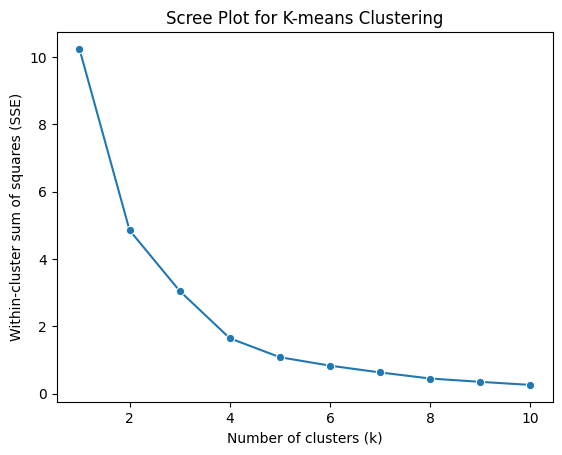

In [31]:
# Create scree plot
k_bar = 10                # maximum number of clusters to try
SSE = []                  # list to hold sum of squared errors

for k in range(1, k_bar+1):   # k goes from 1 to 10
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(X1)              # fit model
    SSE.append(model.inertia_)

# Plot the scree curve
sns.lineplot(x=np.arange(1, k_bar+1), y=SSE, marker="o")
plt.title("Scree Plot for K-means Clustering")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-cluster sum of squares (SSE)")
plt.show()

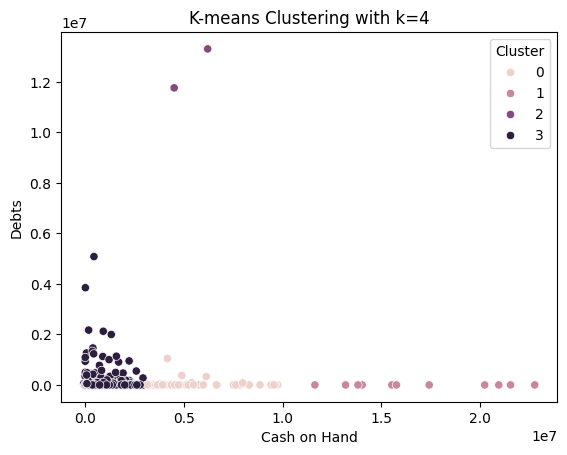

In [32]:
# Chosen k based on scree plot
k = 4
model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
model.fit(X1)

# Add cluster labels back into the dataframe
df["Cluster"] = model.labels_

# Scatter plot of Raised vs Spent, colored by cluster
sns.scatterplot(data=df, x="Cash on Hand", y="Debts", hue="Cluster")
plt.title(f"K-means Clustering with k={k}")
plt.show()

In [33]:
df["Cluster"].value_counts()
small_clusters2 = df["Cluster"].value_counts().nsmallest(2).index
df[df["Cluster"].isin(small_clusters2)]

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Cluster,Cluster_all
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0,1,2
89,89,Chuck Schumer,Democratic,New York,Senate,35899966,25944350,20231213,0,1,1
133,133,David Trone,Democratic,Maryland,House,12990741,6878050,6206371,13302000,2,2
261,261,John Kennedy,Republican,Louisiana,Senate,28119082,18276565,15530074,0,1,1
267,267,John Thune,Republican,South Dakota,Senate,6770674,2763217,17419927,0,1,0
274,274,Josh Gottheimer,Democratic,New Jersey,House,7720264,2045198,14024163,0,1,0
290,290,Katie Porter,Democratic,California,House,21441693,15946876,15762568,0,1,0
310,310,Lindsey Graham,Republican,South Carolina,Senate,6695582,5371524,13815515,0,1,0
340,340,Mark Kelly,Democratic,Arizona,Senate,73140886,61357281,13186127,0,1,1
412,412,Raja Krishnamoorthi,Democratic,Illinois,House,7843935,4638387,11633394,0,1,0


I chose k = 4 based on the scree plot, the decrease in SSE from k = 2 to k = 3 and k = 3 to k = 4 were too similar for k = 3 to be optimal. The smallest cluster is cluster 2, these politicians have extremely high debts and are on the lower end of cash on hand. David Trone and Ron Johnson are in cluster 2 and they both won their races.



### Question 2.4

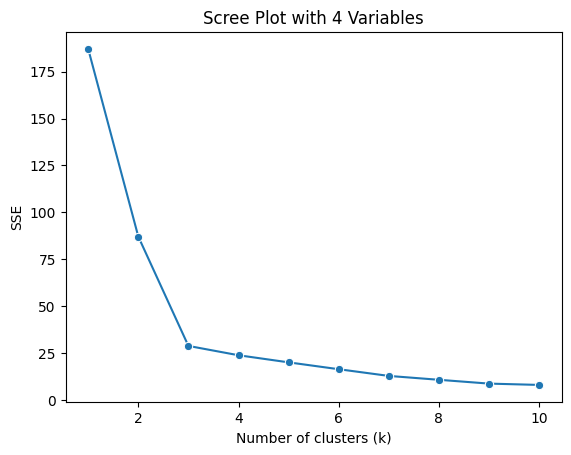

In [35]:
# Select all numeric variables
X_all = df.select_dtypes(include=[np.number])

X_all = X_all.apply(maxmin)

# Scree plot
k_bar = 10
SSE = []
for k in range(1, k_bar+1):
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(X_all)
    SSE.append(model.inertia_)

sns.lineplot(x=np.arange(1, k_bar+1), y=SSE, marker="o")
plt.title("Scree Plot with 4 Variables")
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE")
plt.show()

k = 3
model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
model.fit(X_all)

df["Cluster_all"] = model.labels_


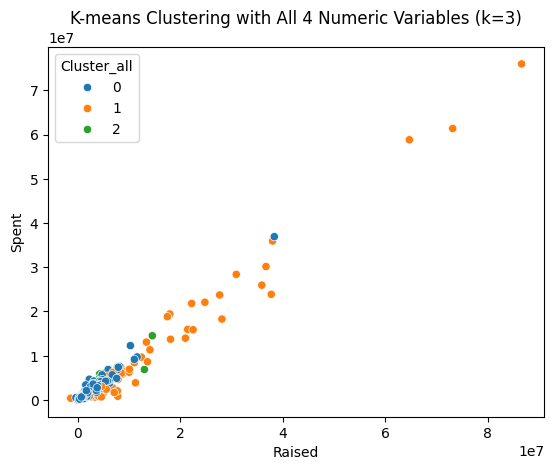

In [39]:
# Scatter plot of Raised vs Spent, colored by clusters using all 4 variables
sns.scatterplot(data=df, x="Raised", y="Spent", hue="Cluster_all", palette="tab10")
plt.title("K-means Clustering with All 4 Numeric Variables (k=3)")
plt.show()


The politicians may be grouped differently since all four variables are being considered. This plot is different from the earlier questions with the clusters being more mixed together when I look at the scatterplot comparing 'Raised' and 'Spent'.

### Question 2.5

The k-MC algorithm helped me find useful patterns for the more extreme cases. The scatterplots grouped by cluster were helpful in showing how candidates handled their finances.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?